In [1]:
import pandas as pd
import pdfplumber

In [2]:
file = 'cms_training.pdf'
pdf = pdfplumber.open(file)

### CHD 

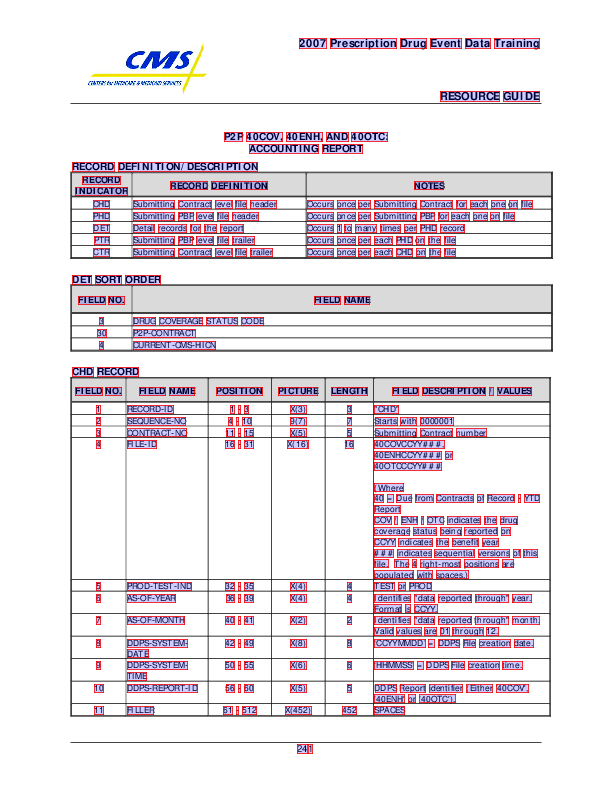

,0,1,2,3,4,5
0,,,,,,
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES
2,,,,,,
3,1,RECORD-ID,1 - 3,X(3),3,"""CHD"""
4,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001
5,3,CONTRACT-NO,11 - 15,X(5),5,Submitting Contract number
6,4,FILE-ID,16 - 31,X(16),16,"40COVCCYY###, \n40ENHCCYY### or \n40OTCCCYY###..."
7,5,PROD-TEST-IND,32 - 35,X(4),4,TEST or PROD
8,6,AS-OF-YEAR,36 - 39,X(4),4,"Identifies ""data reported through"" year. \nFo..."
9,7,AS-OF-MONTH,40 - 41,X(2),2,"Identifies ""data reported through"" month. \nV..."


In [3]:
page_x = pdf.pages[292]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_table())
display(df)

In [4]:
col_names = df.loc[1,:].values
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
df['LENGTH'] = (pd.to_numeric(df['END_POSITION']) - pd.to_numeric(df['START_POSITION']) + 1).astype(str)
#non-generic
df['RECORD'] = 'chd'
chd = df
display(chd)

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD
0,1,RECORD-ID,1 - 3,X(3),3,"""CHD""",1,3,chd
1,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001,4,10,chd
2,3,CONTRACT-NO,11 - 15,X(5),5,Submitting Contract number,11,15,chd
3,4,FILE-ID,16 - 31,X(16),16,"40COVCCYY###, 40ENHCCYY### or 40OTCCCYY### (W...",16,31,chd
4,5,PROD-TEST-IND,32 - 35,X(4),4,TEST or PROD,32,35,chd
5,6,AS-OF-YEAR,36 - 39,X(4),4,"Identifies ""data reported through"" year. Form...",36,39,chd
6,7,AS-OF-MONTH,40 - 41,X(2),2,"Identifies ""data reported through"" month. Val...",40,41,chd
7,8,DDPS-SYSTEM-DATE,42 - 49,X(8),8,‘CCYYMMDD’ = DDPS File creation date.,42,49,chd
8,9,DDPS-SYSTEM-TIME,50 - 55,X(6),6,‘HHMMSS’ = DDPS File creation time.,50,55,chd
9,10,DDPS-REPORT-ID,56 - 60,X(5),5,"DDPS Report identifier (Either '40COV', '40ENH...",56,60,chd


In [5]:
chd.to_csv('chd.csv', index=False)

### PHD 

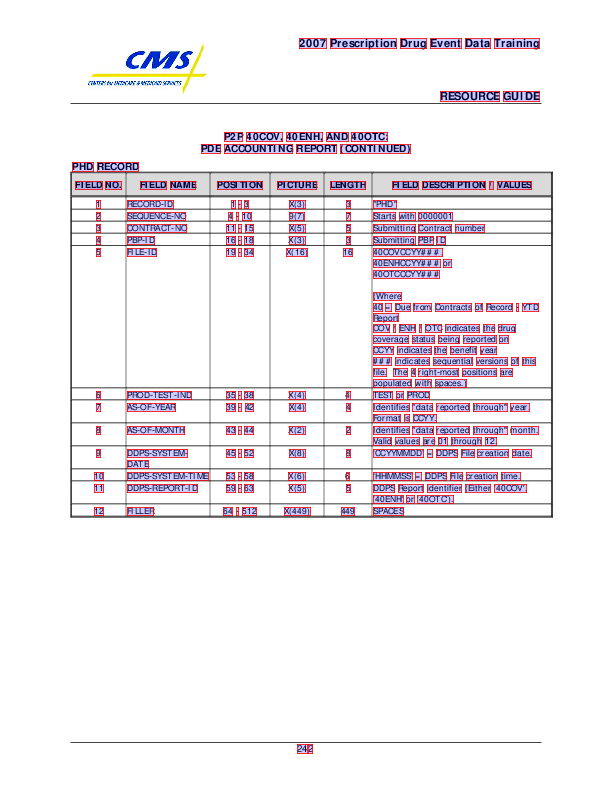

,0,1,2,3,4,5
0,,,,,,
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES
2,,,,,,
3,1,RECORD-ID,1 - 3,X(3),3 \n7 \n5 \n3 \n16 \n4 \n4 \n2 \n8 \n6 \n5 \n449,"""PHD"""
4,2,SEQUENCE-NO,4 - 10,9(7),None,Starts with 0000001
5,3,CONTRACT-NO,11 - 15,X(5),None,Submitting Contract number
6,4,PBP-ID,16 - 18,X(3),None,Submitting PBP ID
7,5,FILE-ID,19 - 34,X(16),None,"40COVCCYY###, \n40ENHCCYY### or \n40OTCCCYY###..."
8,6,PROD-TEST-IND,35 - 38,X(4),None,TEST or PROD
9,7,AS-OF-YEAR,39 - 42,X(4),None,"Identifies ""data reported through"" year. \nFo..."


In [6]:
page_x = pdf.pages[293]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_table())
display(df)

In [7]:
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
df['LENGTH'] = (pd.to_numeric(df['END_POSITION']) - pd.to_numeric(df['START_POSITION']) + 1).astype(str)
#non-generic
df['RECORD'] = 'phd'
phd = df
display(phd)

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD
0,1,RECORD-ID,1 - 3,X(3),3,"""PHD""",1,3,phd
1,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001,4,10,phd
2,3,CONTRACT-NO,11 - 15,X(5),5,Submitting Contract number,11,15,phd
3,4,PBP-ID,16 - 18,X(3),3,Submitting PBP ID,16,18,phd
4,5,FILE-ID,19 - 34,X(16),16,"40COVCCYY###, 40ENHCCYY### or 40OTCCCYY### (W...",19,34,phd
5,6,PROD-TEST-IND,35 - 38,X(4),4,TEST or PROD,35,38,phd
6,7,AS-OF-YEAR,39 - 42,X(4),4,"Identifies ""data reported through"" year. Form...",39,42,phd
7,8,AS-OF-MONTH,43 - 44,X(2),2,"Identifies ""data reported through"" month. Val...",43,44,phd
8,9,DDPS-SYSTEM-DATE,45 - 52,X(8),8,‘CCYYMMDD’ = DDPS File creation date.,45,52,phd
9,10,DDPS-SYSTEM-TIME,53 - 58,X(6),6,‘HHMMSS’ = DDPS File creation time.,53,58,phd


In [8]:
phd.to_csv('phd.csv', index=False)

### DET

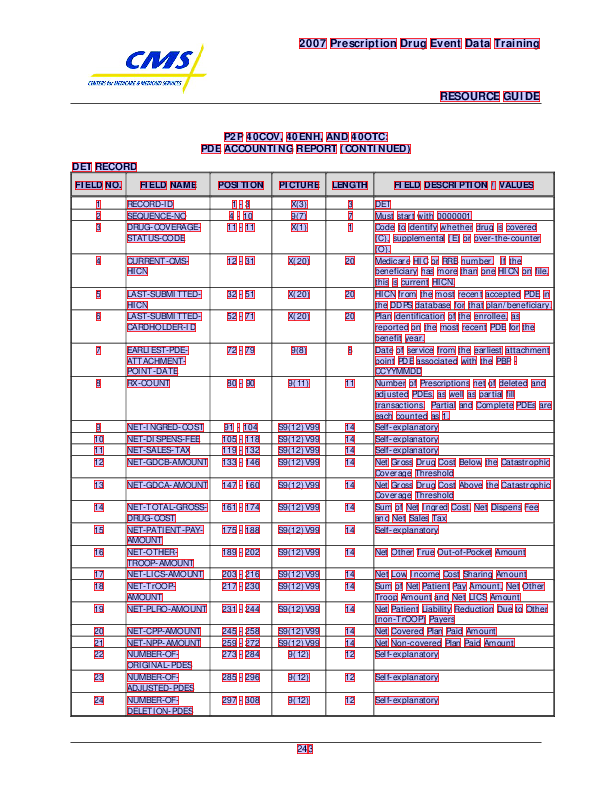

,0,1,2,3,4,5
0,,,,,,FIELD DESCRIPTION / VALUES
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,None
2,,,,,,None
3,1,RECORD-ID,1 - 3,X(3),3,DET
4,2,SEQUENCE-NO,4 - 10,9(7),7,Must start with 0000001
5,3,DRUG-COVERAGE-\nSTATUS-CODE,11 - 11,X(1),1,Code to identify whether drug is covered \n(C)...
6,4,CURRENT-CMS-\nHICN,12 - 31,X(20),20,Medicare HIC or RRB number. If the \nbenefici...
7,5,LAST-SUBMITTED-\nHICN,32 - 51,X(20),20,HICN from the most recent accepted PDE in \nth...
8,6,LAST-SUBMITTED-\nCARDHOLDER-ID,52 - 71,X(20),20,"Plan identification of the enrollee, as \nrepo..."
9,7,EARLIEST-PDE-\nATTACHMENT-\nPOINT-DATE,72 - 79,9(8),8,Date of service from the earliest attachment \...


In [9]:
page_x = pdf.pages[294]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[0])
display(df)

In [10]:
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
df['LENGTH'] = (pd.to_numeric(df['END_POSITION']) - pd.to_numeric(df['START_POSITION']) + 1).astype(str)
#non-generic
df['RECORD'] = 'det'
det1 = df
display(det1)

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD
0,1,RECORD-ID,1 - 3,X(3),3,DET,1,3,det
1,2,SEQUENCE-NO,4 - 10,9(7),7,Must start with 0000001,4,10,det
2,3,DRUG-COVERAGE-STATUS-CODE,11 - 11,X(1),1,"Code to identify whether drug is covered (C), ...",11,11,det
3,4,CURRENT-CMS-HICN,12 - 31,X(20),20,Medicare HIC or RRB number. If the beneficiar...,12,31,det
4,5,LAST-SUBMITTED-HICN,32 - 51,X(20),20,HICN from the most recent accepted PDE in the ...,32,51,det
5,6,LAST-SUBMITTED-CARDHOLDER-ID,52 - 71,X(20),20,"Plan identification of the enrollee, as report...",52,71,det
6,7,EARLIEST-PDE-ATTACHMENT-POINT-DATE,72 - 79,9(8),8,Date of service from the earliest attachment p...,72,79,det
7,8,RX-COUNT,80 - 90,9(11),11,Number of Prescriptions net of deleted and adj...,80,90,det
8,9,NET-INGRED-COST,91 - 104,S9(12)V99,14,Self-explanatory,91,104,det
9,10,NET-DISPENS-FEE,105 - 118,S9(12)V99,14,Self-explanatory,105,118,det


In [11]:
det1.to_csv('det1.csv', index=False)

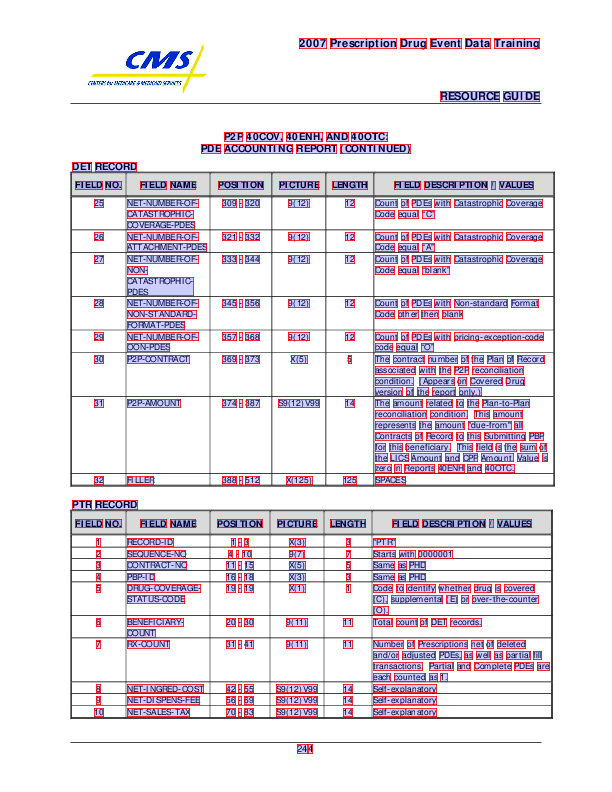

,0,1,2,3,4,5
0,,,,,,FIELD DESCRIPTION / VALUES
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,None
2,,,,,,None
3,25,NET-NUMBER-OF-\nCATASTROPHIC-\nCOVERAGE-PDES,309 - 320,9(12),12,Count of PDEs with Catastrophic Coverage \nCod...
4,26,NET-NUMBER-OF-\nATTACHMENT-PDES,321 - 332,9(12),12,Count of PDEs with Catastrophic Coverage \nCod...
5,27,NET-NUMBER-OF-\nNON-\nCATASTROPHIC-\nPDES,333 - 344,9(12),12,Count of PDEs with Catastrophic Coverage \nCod...
6,28,NET-NUMBER-OF-\nNON-STANDARD-\nFORMAT-PDES,345 - 356,9(12),12,Count of PDEs with Non-standard Format \nCode ...
7,29,NET-NUMBER-OF-\nOON-PDES,357 - 368,9(12),12,Count of PDEs with pricing-exception-code \nco...
8,30,P2P-CONTRACT,369 - 373,X(5),5,The contract number of the Plan of Record \nas...
9,31,P2P-AMOUNT,374 - 387,S9(12)V99,14,The amount related to the Plan-to-Plan \nrecon...


In [12]:
page_x = pdf.pages[295]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[0])
display(df)

In [13]:
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
df['LENGTH'] = (pd.to_numeric(df['END_POSITION']) - pd.to_numeric(df['START_POSITION']) + 1).astype(str)
#non-generic
df['RECORD'] = 'det'
det2 = df
display(det2)

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD
0,25,NET-NUMBER-OF-CATASTROPHIC-COVERAGE-PDES,309 - 320,9(12),12,Count of PDEs with Catastrophic Coverage Code ...,309,320,det
1,26,NET-NUMBER-OF-ATTACHMENT-PDES,321 - 332,9(12),12,Count of PDEs with Catastrophic Coverage Code ...,321,332,det
2,27,NET-NUMBER-OF-NON-CATASTROPHIC-PDES,333 - 344,9(12),12,Count of PDEs with Catastrophic Coverage Code ...,333,344,det
3,28,NET-NUMBER-OF-NON-STANDARD-FORMAT-PDES,345 - 356,9(12),12,Count of PDEs with Non-standard Format Code ot...,345,356,det
4,29,NET-NUMBER-OF-OON-PDES,357 - 368,9(12),12,Count of PDEs with pricing-exception-code code...,357,368,det
5,30,P2P-CONTRACT,369 - 373,X(5),5,The contract number of the Plan of Record asso...,369,373,det
6,31,P2P-AMOUNT,374 - 387,S9(12)V99,14,The amount related to the Plan-to-Plan reconci...,374,387,det
7,32,FILLER,388 - 512,X(125),125,SPACES,388,512,det


In [14]:
det2.to_csv('det2.csv', index=False)

### PTR

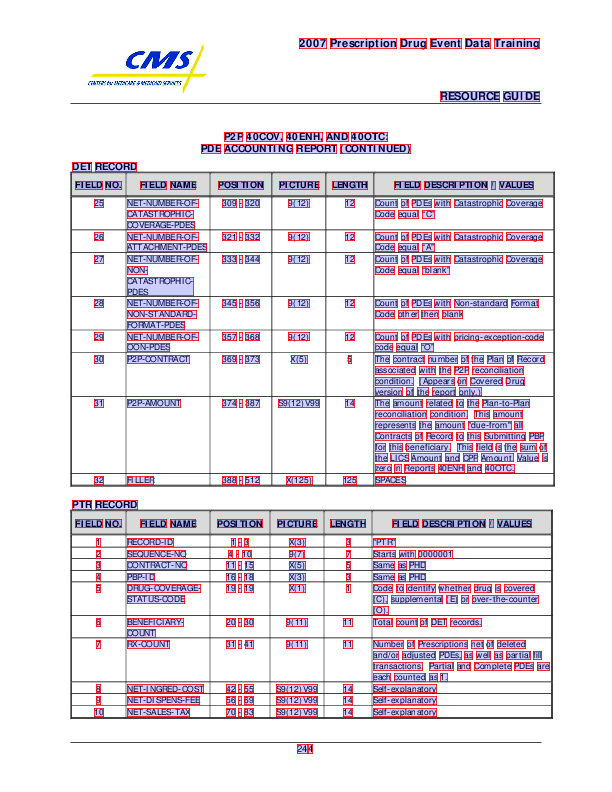

,0,1,2,3,4,5
0,,,,,,
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES
2,,,,,,
3,1,RECORD-ID,1 - 3,X(3),3 \n7 \n5 \n3 \n1 \n11 \n11 \n14 \n14 \n14,"""PTR"""
4,2,SEQUENCE-NO,4 - 10,9(7),None,Starts with 0000001
5,3,CONTRACT-NO,11 - 15,X(5),None,Same as PHD
6,4,PBP-ID,16 - 18,X(3),None,Same as PHD
7,5,DRUG-COVERAGE-\nSTATUS-CODE,19 - 19,X(1),None,Code to identify whether drug is covered \n(C)...
8,6,BENEFICIARY-\nCOUNT,20 - 30,9(11),None,Total count of DET records.
9,7,RX-COUNT,31 - 41,9(11),None,Number of Prescriptions net of deleted \nand/o...


In [15]:
page_x = pdf.pages[295]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[1])
display(df)

In [16]:
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
df['LENGTH'] = (pd.to_numeric(df['END_POSITION']) - pd.to_numeric(df['START_POSITION']) + 1).astype(str)
#non-generic
df['RECORD'] = 'ptr'
ptr1 = df
display(ptr1)

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD
0,1,RECORD-ID,1 - 3,X(3),3,"""PTR""",1,3,ptr
1,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001,4,10,ptr
2,3,CONTRACT-NO,11 - 15,X(5),5,Same as PHD,11,15,ptr
3,4,PBP-ID,16 - 18,X(3),3,Same as PHD,16,18,ptr
4,5,DRUG-COVERAGE-STATUS-CODE,19 - 19,X(1),1,"Code to identify whether drug is covered (C), ...",19,19,ptr
5,6,BENEFICIARY-COUNT,20 - 30,9(11),11,Total count of DET records.,20,30,ptr
6,7,RX-COUNT,31 - 41,9(11),11,Number of Prescriptions net of deleted and/or ...,31,41,ptr
7,8,NET-INGRED-COST,42 - 55,S9(12)V99,14,Self-explanatory,42,55,ptr
8,9,NET-DISPENS-FEE,56 - 69,S9(12)V99,14,Self-explanatory,56,69,ptr
9,10,NET-SALES-TAX,70 - 83,S9(12)V99,14,Self-explanatory,70,83,ptr


In [17]:
ptr1.to_csv('ptr1.csv', index=False)

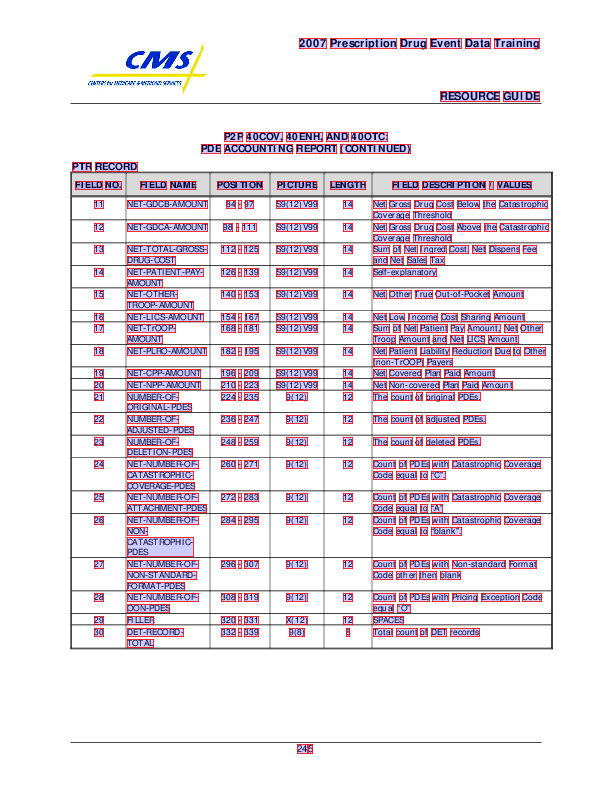

,0,1,2,3,4,5
0,,,,,,
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES
2,,,,,,
3,11,NET-GDCB-AMOUNT,84 - 97,S9(12)V99,14 \n14 \n14 \n14 \n14 \n14 \n14 \n14 \n14 \n1...,Net Gross Drug Cost Below the Catastrophic \nC...
4,12,NET-GDCA-AMOUNT,98 - 111,S9(12)V99,None,Net Gross Drug Cost Above the Catastrophic \nC...
5,13,NET-TOTAL-GROSS-\nDRUG-COST,112 - 125,S9(12)V99,None,"Sum of Net Ingred Cost, Net Dispens Fee \nand ..."
6,14,NET-PATIENT-PAY-\nAMOUNT,126 - 139,S9(12)V99,None,Self-explanatory
7,15,NET-OTHER-\nTROOP-AMOUNT,140 - 153,S9(12)V99,None,Net Other True Out-of-Pocket Amount
8,16,NET-LICS-AMOUNT,154 - 167,S9(12)V99,None,Net Low Income Cost Sharing Amount
9,17,NET-TrOOP-\nAMOUNT,168 - 181,S9(12)V99,None,"Sum of Net Patient Pay Amount, Net Other \nTro..."


In [18]:
page_x = pdf.pages[296]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_table())
display(df)

In [19]:
col_names = df.loc[1,:].values
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
df['LENGTH'] = (pd.to_numeric(df['END_POSITION']) - pd.to_numeric(df['START_POSITION']) + 1).astype(str)

#non-generic
df['RECORD'] = 'ptr'
ptr2 = df
display(ptr2)

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD
0,11,NET-GDCB-AMOUNT,84 - 97,S9(12)V99,14,Net Gross Drug Cost Below the Catastrophic Cov...,84,97,ptr
1,12,NET-GDCA-AMOUNT,98 - 111,S9(12)V99,14,Net Gross Drug Cost Above the Catastrophic Cov...,98,111,ptr
2,13,NET-TOTAL-GROSS-DRUG-COST,112 - 125,S9(12)V99,14,"Sum of Net Ingred Cost, Net Dispens Fee and Ne...",112,125,ptr
3,14,NET-PATIENT-PAY-AMOUNT,126 - 139,S9(12)V99,14,Self-explanatory,126,139,ptr
4,15,NET-OTHER-TROOP-AMOUNT,140 - 153,S9(12)V99,14,Net Other True Out-of-Pocket Amount,140,153,ptr
5,16,NET-LICS-AMOUNT,154 - 167,S9(12)V99,14,Net Low Income Cost Sharing Amount,154,167,ptr
6,17,NET-TrOOP-AMOUNT,168 - 181,S9(12)V99,14,"Sum of Net Patient Pay Amount, Net Other Troop...",168,181,ptr
7,18,NET-PLRO-AMOUNT,182 - 195,S9(12)V99,14,Net Patient Liability Reduction Due to Other (...,182,195,ptr
8,19,NET-CPP-AMOUNT,196 - 209,S9(12)V99,14,Net Covered Plan Paid Amount,196,209,ptr
9,20,NET-NPP-AMOUNT,210 - 223,S9(12)V99,14,Net Non-covered Plan Paid Amount,210,223,ptr


In [20]:
ptr2.to_csv('ptr2.csv', index=False)

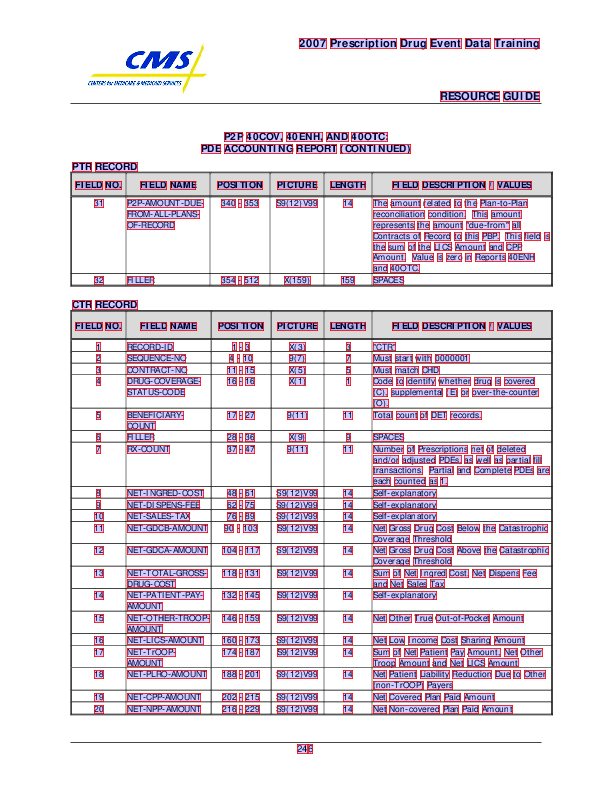

,0,1,2,3,4,5
0,,,,,,
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES
2,,,,,,
3,31,P2P-AMOUNT-DUE-\nFROM-ALL-PLANS-\nOF-RECORD,340 - 353,S9(12)V99,14 \n159,The amount related to the Plan-to-Plan \nrecon...
4,32,FILLER,354 - 512,X(159),None,SPACES


In [21]:
page_x = pdf.pages[297]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[0])
display(df)

In [22]:
col_names = df.loc[1,:].values
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
df['LENGTH'] = (pd.to_numeric(df['END_POSITION']) - pd.to_numeric(df['START_POSITION']) + 1).astype(str)

#non-generic
df['RECORD'] = 'ptr'
ptr3 = df
display(ptr3)

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD
0,31,P2P-AMOUNT-DUE-FROM-ALL-PLANS-OF-RECORD,340 - 353,S9(12)V99,14,The amount related to the Plan-to-Plan reconci...,340,353,ptr
1,32,FILLER,354 - 512,X(159),159,SPACES,354,512,ptr


In [23]:
ptr3.to_csv('ptr3.csv', index=False)

### CTR

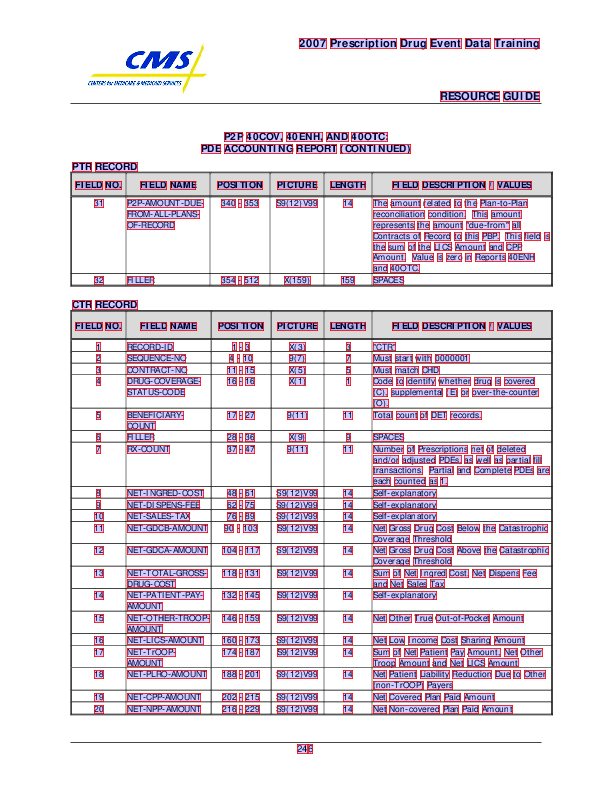

,0,1,2,3,4,5
0,,,,,,
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES
2,,,,,,
3,1,RECORD-ID,1 - 3,X(3),3 \n7 \n5 \n1 \n11 \n9 \n11 \n14 \n14 \n14 \n1...,"""CTR"""
4,2,SEQUENCE-NO,4 - 10,9(7),None,Must start with 0000001
5,3,CONTRACT-NO,11 - 15,X(5),None,Must match CHD
6,4,DRUG-COVERAGE-\nSTATUS-CODE,16 - 16,X(1),None,Code to identify whether drug is covered \n(C)...
7,5,BENEFICIARY-\nCOUNT,17 - 27,9(11),None,Total count of DET records.
8,6,FILLER,28 - 36,X(9),None,SPACES
9,7,RX-COUNT,37 - 47,9(11),None,Number of Prescriptions net of deleted \nand/o...


In [24]:
page_x = pdf.pages[297]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[1])
display(df)

In [25]:
col_names = df.loc[1,:].values
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
df['LENGTH'] = (pd.to_numeric(df['END_POSITION']) - pd.to_numeric(df['START_POSITION']) + 1).astype(str)

#non-generic
df['RECORD'] = 'ctr'
ctr1 = df
display(ctr1)

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD
0,1,RECORD-ID,1 - 3,X(3),3,"""CTR""",1,3,ctr
1,2,SEQUENCE-NO,4 - 10,9(7),7,Must start with 0000001,4,10,ctr
2,3,CONTRACT-NO,11 - 15,X(5),5,Must match CHD,11,15,ctr
3,4,DRUG-COVERAGE-STATUS-CODE,16 - 16,X(1),1,"Code to identify whether drug is covered (C), ...",16,16,ctr
4,5,BENEFICIARY-COUNT,17 - 27,9(11),11,Total count of DET records.,17,27,ctr
5,6,FILLER,28 - 36,X(9),9,SPACES,28,36,ctr
6,7,RX-COUNT,37 - 47,9(11),11,Number of Prescriptions net of deleted and/or ...,37,47,ctr
7,8,NET-INGRED-COST,48 - 61,S9(12)V99,14,Self-explanatory,48,61,ctr
8,9,NET-DISPENS-FEE,62 - 75,S9(12)V99,14,Self-explanatory,62,75,ctr
9,10,NET-SALES-TAX,76 - 89,S9(12)V99,14,Self-explanatory,76,89,ctr


In [26]:
ctr1.to_csv('ctr1.csv', index=False)

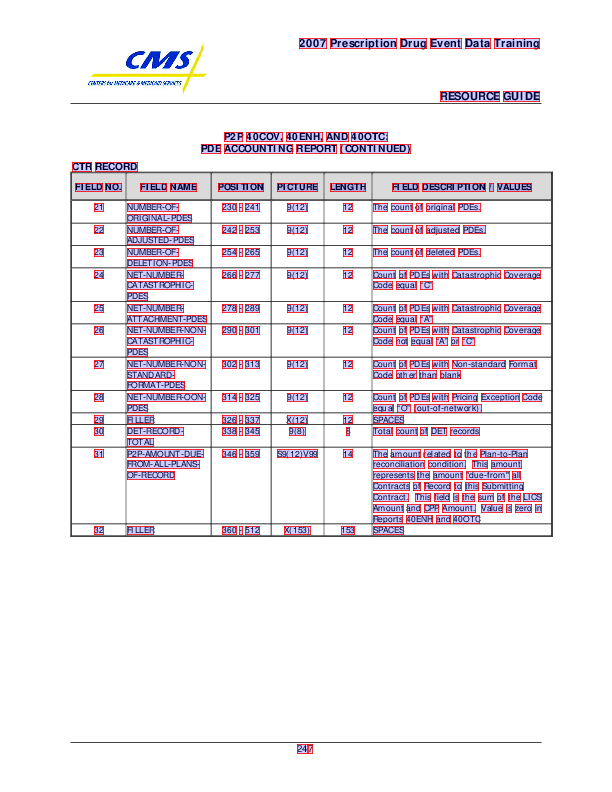

,0,1,2,3,4,5
0,,,,,,
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES
2,,,,,,
3,21,NUMBER-OF-\nORIGINAL-PDES,230 - 241,9(12),12 \n12 \n12 \n12 \n12 \n12 \n12 \n12 \n12 \n8...,The count of original PDEs.
4,22,NUMBER-OF-\nADJUSTED-PDES,242 - 253,9(12),None,The count of adjusted PDEs.
5,23,NUMBER-OF-\nDELETION-PDES,254 - 265,9(12),None,The count of deleted PDEs.
6,24,NET-NUMBER-\nCATASTROPHIC-\nPDES,266 - 277,9(12),None,Count of PDEs with Catastrophic Coverage \nCod...
7,25,NET-NUMBER-\nATTACHMENT-PDES,278 - 289,9(12),None,Count of PDEs with Catastrophic Coverage \nCod...
8,26,NET-NUMBER-NON-\nCATASTROPHIC-\nPDES,290 - 301,9(12),None,Count of PDEs with Catastrophic Coverage \nCod...
9,27,NET-NUMBER-NON-\nSTANDARD-\nFORMAT-PDES,302 - 313,9(12),None,Count of PDEs with Non-standard Format \nCode ...


In [27]:
page_x = pdf.pages[298]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[0])
display(df)

In [28]:
col_names = df.loc[1,:].values
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
df['LENGTH'] = (pd.to_numeric(df['END_POSITION']) - pd.to_numeric(df['START_POSITION']) + 1).astype(str)

#non-generic
df['RECORD'] = 'ctr'
ctr2 = df
display(ctr2)

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD
0,21,NUMBER-OF-ORIGINAL-PDES,230 - 241,9(12),12,The count of original PDEs.,230,241,ctr
1,22,NUMBER-OF-ADJUSTED-PDES,242 - 253,9(12),12,The count of adjusted PDEs.,242,253,ctr
2,23,NUMBER-OF-DELETION-PDES,254 - 265,9(12),12,The count of deleted PDEs.,254,265,ctr
3,24,NET-NUMBER-CATASTROPHIC-PDES,266 - 277,9(12),12,Count of PDEs with Catastrophic Coverage Code ...,266,277,ctr
4,25,NET-NUMBER-ATTACHMENT-PDES,278 - 289,9(12),12,Count of PDEs with Catastrophic Coverage Code ...,278,289,ctr
5,26,NET-NUMBER-NON-CATASTROPHIC-PDES,290 - 301,9(12),12,Count of PDEs with Catastrophic Coverage Code ...,290,301,ctr
6,27,NET-NUMBER-NON-STANDARD-FORMAT-PDES,302 - 313,9(12),12,Count of PDEs with Non-standard Format Code ot...,302,313,ctr
7,28,NET-NUMBER-OON-PDES,314 - 325,9(12),12,Count of PDEs with Pricing Exception Code equa...,314,325,ctr
8,29,FILLER,326 - 337,X(12),12,SPACES,326,337,ctr
9,30,DET-RECORD-TOTAL,338 - 345,9(8),8,Total count of DET records,338,345,ctr


In [29]:
ctr2.to_csv('ctr2.csv', index=False)

In [37]:
cms_dfs = [chd,phd,det1,det2,ptr1,ptr2,ptr3,ctr1,ctr2]
cms_df = cms_dfs[0].append(cms_dfs[1:])
cms_df = cms_df.reset_index(drop=True)
#for dfx in cms_dfs[1:]:
#    cms_df

In [38]:
cms_df[:50]

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD
0,1,RECORD-ID,1 - 3,X(3),3,"""CHD""",1,3,chd
1,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001,4,10,chd
2,3,CONTRACT-NO,11 - 15,X(5),5,Submitting Contract number,11,15,chd
3,4,FILE-ID,16 - 31,X(16),16,"40COVCCYY###, 40ENHCCYY### or 40OTCCCYY### (W...",16,31,chd
4,5,PROD-TEST-IND,32 - 35,X(4),4,TEST or PROD,32,35,chd
5,6,AS-OF-YEAR,36 - 39,X(4),4,"Identifies ""data reported through"" year. Form...",36,39,chd
6,7,AS-OF-MONTH,40 - 41,X(2),2,"Identifies ""data reported through"" month. Val...",40,41,chd
7,8,DDPS-SYSTEM-DATE,42 - 49,X(8),8,‘CCYYMMDD’ = DDPS File creation date.,42,49,chd
8,9,DDPS-SYSTEM-TIME,50 - 55,X(6),6,‘HHMMSS’ = DDPS File creation time.,50,55,chd
9,10,DDPS-REPORT-ID,56 - 60,X(5),5,"DDPS Report identifier (Either '40COV', '40ENH...",56,60,chd


In [40]:
cms_df.to_csv('cms_df.csv', index=False)
cms_df.to_excel('cms_df.xlsx', index=False)